In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['science', 'notebook', 'grid'])

# 1. Orthogonality of Legendre Polynomials

> **Legendre polynomial genrating recursion relationship:**

$$lP_l = (2l-1)xP_{l-1}-(l-1)P_{l-2}$$
 
Base condtions: $P(0) = 1, P(1) = x$

In [2]:
# Recursive relation for Legendre Polynomial
def P(n, x): 
    if(n == 0):
        return x**0 
    elif(n == 1):
        return x 
    else:
        return ((2*n - 1)*x*P(n-1, x)-(n-1)*P(n-2, x))/n

In [3]:
def Simpson(xi, xf, n, f):
    x = np.linspace(xi, xf, n)
    h = (xf - xi)/(n - 1)
    y = f(x)
    #Sum of Odd terms 
    sum1 = 0
    for i in range(1, n-1, 2):
        sum1 += y[i]
    #Sum of even terms
    sum2 = 0
    for i in range(2, n-1, 2):
        sum2 += y[i]
    
    return h*(y[0] + 4*sum1 + 2*sum2 + y[n-1])/3


As Legendre polynomial forms a complete basis function, so any function can be written in terms of Legendre polynomial. 
$$f(x) = \sum_{l=0}^{\infty}a_l P_l(x)$$

**Evalution of coefficient**
$$a_m = \left(m + \frac{1}{2}\right) \int_{-1}^{1}f(x)P_m(x)dx$$

> **Problem 1**: Fit the given function using Legendre polynomials :

$$ f(x)=  \left\{
\begin{array}{ll}
      0 & [-1, 0] \\
      1 & [0,1] \\
\end{array} 
\right. 
$$


In [4]:
def a(m):
    return (m+1/2)*(Simpson(-1, 0, 501, f = lambda x: 0*x) + Simpson(0, 1, 501, f = lambda x: P(m, x)))

In [5]:
# Legendre series
def Legendre(x, n):
    Legendre= 0
    for i in range(0,n+1):
        Legendre += a(i)* P(i, x)  
        
        '''⚠ I took every terms so if your expansions have so zero terms 
        then don't expect the exact number of terms.'''
        
    return Legendre

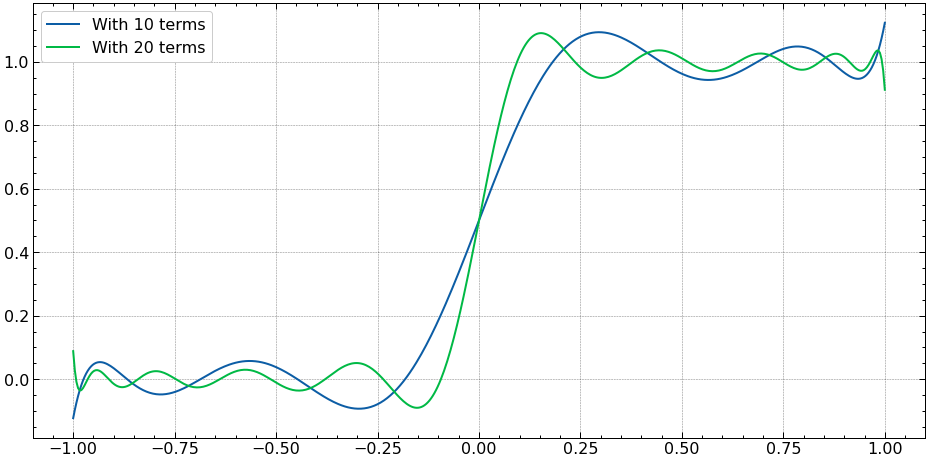

In [6]:
x = np.linspace(-1, 1, 500)
y1 = Legendre(x, 10)
y2 = Legendre(x, 20)
'''In this case every even terms get zero. so 24 terms does not confirm exact upto 24 terms.
So how many terms I took?
Note: We have to take a(0). So 24 terms means 23//2 == 12 terms in your excerise book.
'''

#Plotting
plt.figure(figsize=(16,8))
plt.plot(x,y1, label = "With 10 terms")
plt.plot(x, y2, label = "With 20 terms")
plt.legend(loc = "best")
plt.show()

# 2. Orthogonality of Hermite Polynomial

> **Hermite polynomial genrating recursion relationship:**

$$H_n (x) = 2x H_{n-1}(x)-2nH_{n-2}(x)$$
 
Base condtions: $H(0) = 1, H(1) = 2x$

In [7]:
def H(n, x):
    if n == 0:
        return x**0
    elif n == 1:
        return 2*x
    else:
        return 2*x*H(n-1, x) - 2*n*H(n-2, x)

As Hermite polynomial forms a complete basis function, so any function can be written in terms of Hermite polynomial. 
$$f(x) = \sum_{l=0}^{\infty}a_n H_n(x)$$

**Evalution of coefficient**
$$a_n = \frac{1}{2^nn! \sqrt{\pi}} \int_{-\infty}^{\infty}f(x)H_n(x)e^{-x^2}dx$$

> **Problem 1**: Fit the given curve using Hermite polynomials :

$$ f(x)=  \left\{
\begin{array}{ll}
      1 & [-1, 1] \\
      0 & [else] \\
\end{array} 
\right. 
$$


In [8]:
import math as m

def b(n):
    return (Simpson(-1, 1, 51, f = lambda x: H(n, x)*np.exp(-x*x)))/(m.factorial(n)*np.sqrt(np.pi)*2**n)

In [9]:
# Hermite series
def Hermite(x, n):
    Hermite = 0
    for i in range(0,n+1):
        Hermite += b(i)* H(i, x)  
        
    return Hermite

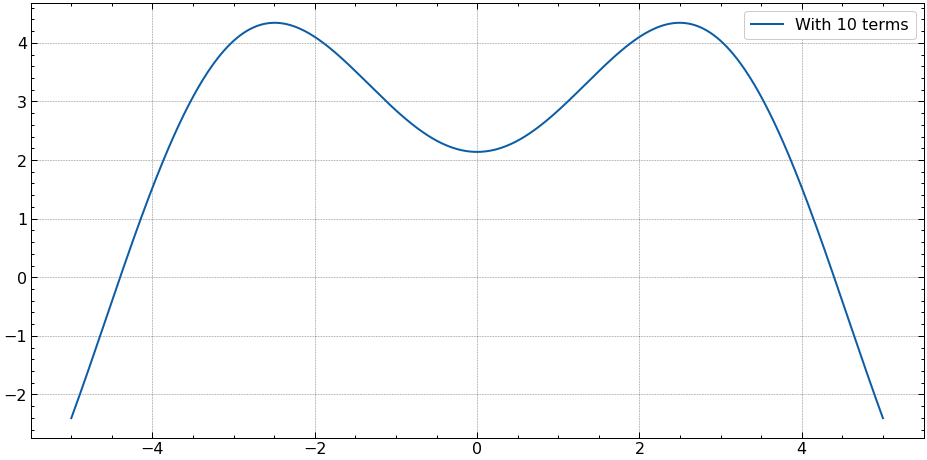

In [10]:
xx = np.linspace(-5, 5, 500)
yy1 = Hermite(x, 30)
#yy2 = Hermite(x, 40)


#Plotting
plt.figure(figsize=(16,8))
plt.plot(xx,yy1, label = "With 10 terms")
#plt.plot(xx, yy2, label = "With 20 terms")
plt.legend(loc = "best")
plt.show()